# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

## Добро пожаловать на курс по машинному обучению на кафедре ПМиФИ.

![](https://www.calltouch.ru/upload/medialibrary/498/49825604948da1b5a83f1f89c45c26e9.jpg)

## Классификация задач машинного обучения

Прежде всего напоминаю, что <b>машинным обучением называется</b> раздел искусственного интеллекта изучающий методы построения алгоритмов, способных обучаться. В основе всего здесь лежит математическая статистика, поскольку обучение (даже в бытовом смысле) - это поиск закономерностей.

Мы будем рассматривать <b>классическое обучение</b>, которое включает в себя <b>два основных класса задач</b>.

![](https://static.tildacdn.com/tild3533-6161-4335-a633-643631363962/8.jpeg)

## Модель в машинном обучении. Общая схема решения задачи обучения с учителем

В рамках изучаемой дисциплины мы будем часто употреблять термин <b>"модель"</b>. Следует сразу же понять, что оно означает. Предлагается понимать модель как некоторый объект (сущность, алгоритм), который может:
- принимать данные и возвращать предсказания (predict);
- принимать данные и обновлять внутреннее состояние, то есть обучаться (fit).

<b>Обучение с учителем</b> - это класс задач машинного обучения, в котором нашей целью является получение предсказаний какого либо признака в данных (называемого целевым). При этом подразумевается, что у нас есть некоторое <b>множество данных с известными правильными ответами </b> (то есть данные заранее размечены - поэтому и называется обучение с учителем). Модель при обучении будет использовать информацию о правильных ответах.

Задачи регрессии и классификации по своему смыслу похожи. Основное отличие заключается в том, что <b>в задаче регрессии мы предсказываем непрерывное значение (действительое число), а в задаче классификации - дискретное (целое число). </b>

<b>Общая схема решения задачи обучения с учителем выглядит следующим образом:</b>
1) загрузка и анализ данных; выявление целевого признака (то, что мы хотим предсказывать)
2) предварительная обработка данных (в частности, заполнение пропущенных значений, преобразование категориальных признаков);
3) построение моделей с использованием различных множеств значений гиперпараметров;
4) оценивание качества построенных моделей с использованием метрик; выбор лучшей модели;
5) применение модели для получения предсказаний.

## Задача регрессии

В первой лабораторной работе мы научимся решать задачу регрессии.

### Загрузка данных

Для демонстрации подходов к решению задачи регрессии мы будем использовать данные о стоимости домов в некотором городе. Как сказано выше, решая задачу регрессии строим модель, которая будет предсказывать числа. Мы хотим научиться предсказывать стоимость дома по совокупности признаков.

In [171]:
import pandas as pd

In [172]:
data = pd.read_csv('../data/regression/apartment_data_preprocessed.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,...,c_management_in_trust,c_self_management,c_Bangoge,c_Banwoldang,c_Chil-sung-market,c_Daegu,c_Kyungbuk_uni_hospital,c_Myung-duk,c_Sin-nam,c_no_subway_nearby
0,141592,2006,2007,8,814,3,111.0,184.0,1,2,...,1,0,0,0,0,0,1,0,0,0
1,51327,1985,2007,8,587,8,80.0,76.0,2,3,...,0,1,0,0,0,1,0,0,0,0
2,48672,1985,2007,8,587,6,80.0,76.0,2,3,...,0,1,0,0,0,1,0,0,0,0
3,380530,2006,2007,8,2056,8,249.0,536.0,2,4,...,1,0,0,0,0,0,0,0,1,0
4,221238,1993,2007,8,1761,3,523.0,536.0,2,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,0.0,1270.0,2,4,...,1,0,0,0,0,0,1,0,0,0
5887,298230,2006,2017,8,903,13,123.0,181.0,1,4,...,1,0,0,0,0,0,0,1,0,0
5888,357522,2007,2017,8,868,20,0.0,1270.0,2,4,...,1,0,0,0,0,0,1,0,0,0
5889,312389,1978,2017,8,1327,1,87.0,0.0,2,4,...,0,1,0,0,0,0,1,0,0,0


<b>Обратите внимание: </b> перед решением любой задачи машинного обучения данные должны быть предобработаны! Не должно быть пропущенных значений. Все признаки должны быть числовыми. Вы учились предобрабатывать данные в рамках дисциплины "Практикум по программированию".

В данном случае, предобработка данных выполнена. Поэтому сосредоточимся на моделировании.

### Первый шаг: выделение целевого признака и предикторов

И так, у нас есть данные о стоимости 5891 домов. Помимо непосредственно стоимости у нас есть еще 40 признаков (предикторов), хараактеризующих дом (начиная от года постройки и заканчивая типом отопления). Мы хотим научиться предсказывать стоимость дома на основезначений всех предикторов (предикторов, от слова predict - признаков, по которым мы предсказываем целевой). То есть, в данном случае, мы хотим научиться предсказывать значение признака "SalePrice".

Решение задачи начинается с выделения целевого признака и предикторов. Делается это с помощью pandas.

In [173]:
y = data["SalePrice"]
X = data.drop(["SalePrice"], axis=1)

In [174]:
y

0       141592
1        51327
2        48672
3       380530
4       221238
         ...  
5886    511504
5887    298230
5888    357522
5889    312389
5890    393805
Name: SalePrice, Length: 5891, dtype: int64

In [175]:
X

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,...,c_management_in_trust,c_self_management,c_Bangoge,c_Banwoldang,c_Chil-sung-market,c_Daegu,c_Kyungbuk_uni_hospital,c_Myung-duk,c_Sin-nam,c_no_subway_nearby
0,2006,2007,8,814,3,111.0,184.0,1,2,3.0,...,1,0,0,0,0,0,1,0,0,0
1,1985,2007,8,587,8,80.0,76.0,2,3,1.0,...,0,1,0,0,0,1,0,0,0,0
2,1985,2007,8,587,6,80.0,76.0,2,3,1.0,...,0,1,0,0,0,1,0,0,0,0
3,2006,2007,8,2056,8,249.0,536.0,2,4,6.0,...,1,0,0,0,0,0,0,0,1,0
4,1993,2007,8,1761,3,523.0,536.0,2,1,8.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,2007,2017,8,1643,19,0.0,1270.0,2,4,7.0,...,1,0,0,0,0,0,1,0,0,0
5887,2006,2017,8,903,13,123.0,181.0,1,4,3.0,...,1,0,0,0,0,0,0,1,0,0
5888,2007,2017,8,868,20,0.0,1270.0,2,4,7.0,...,1,0,0,0,0,0,1,0,0,0
5889,1978,2017,8,1327,1,87.0,0.0,2,4,2.0,...,0,1,0,0,0,0,1,0,0,0


### Второй шаг: разделение данных на обучающую и тестовую выборки

При решении задач классического обучения наборы данных X и y как правило делятся еще 2 части - на X_train, X_test и y_train, y_test соответственно. Для чего? Все просто.

<b>Обучать</b> модели мы будем на наборах X_train и y_train. А <b>оценивать их качество</b> на наборах X_test и y_test. То есть в процессе обучения модель не будет знать информацию о домах из наборов X_test и y_test. Значит, мы сможем получать реалистичные предсказания и смотреть, как часто модель ошибается.

Здесь мы впервые воспользуемся новой библиотекой - sklearn. Эту библиотеку мы будем использовать повсеместно, поскольку в ней реализовано большое количество различных алгоритмов машинного обучения. Но, помимо этого, в ней реализовано множество полезных утилитарных функций и метрик. В частности, есть функция, которая позволяет разбить данные на обучающую и тестовую выборки.

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# указав параметр test_size = 0.2 получим, что 20% данных уйдут в тестовую выборку
# также в функцию можно передать параметр shuffle: по умолчанию функция рандомно
# перемешивает данные; поэтому и модели будут получаться разные;
# задайте параметр shuffle = False, если не хотите перемешивать

In [177]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4712, 40), (4712,), (1179, 40), (1179,))

Итак, данные предобработаны, целевой признак выделен, имеются обучающая и тестовая выборка. Мы готовы приступить к обучению.

### Линейная регрессия (Linear Regression). Постановка задачи

Добавим немного несложной математики для понимания картины.

Важно понимать, что <b>все методы машинного обучения основаны на подборе некоторых весов, или коэффициентов</b>, которые позволяют из строки из X получить число из y. Но фишка в том, что как получить y на основе X модель не знает и никогда, в общем случае, не узнает. Но при этом, она может научиться предсказывать некоторые числа $\hat{y}$ которые будут очень близки к истинным значениям $y$.

Пусть матрица $X$ - Это матрицы предикторов. Строки - объекты (в данном случае дома). Их $m$ штук. Столбцы - это предикторы. Их $n$ штук. Символом $i$ мы будем обозначать $i$-й объект. Символом $j$ - $j$-й предиктор. $X_{ij}$ - значение $j$ предиктора у $i$ объекта. $\hat{y_i}$ - предсказываемое моделью значение целевого признака для $i$-го объекта. $y_i$ - истинное значение целевого признака для $i$-го объекта.

Линейная регрессия - это вычисление $\hat{y}$ по формуле: $\hat{y}_i=\sum_{j=1}^{n}{{w_{j}}{X_{ij}}}$. Все очень просто. Берем строку матрицы и умножаем каждый элемент на некоторый вес (вес данного предиктора - как бы его вклад в значение целевого признака). И в конце добавляем еще одну константу. В чем прикол? Прикол в том, что параметры $w$ <b>подбираются в процессе обучения модели</b>. Параметры $w$ называются весами.

То есть изначально они задаются случайным образом, поэтому модель выдает всякий бред, далекий от истинных значений целевого признака. Но в процессе обучения <b>подбираются (модель самостоятельно это делает) такие значения параметров $w$, которые позволят получать очень близкие к истинным значения.</b> Но как подбираются эти веса (коэффициенты)?

В основе любого обучения лежит оптимизация (минимизация) некоторой функции, называемой <b>функцией ошибок</b> (loss function) или функцией потерь (cost function). Эта функция, очевидно, должна относительно значений $\hat{y}$ и $y$ определять величину ошибки. То есть давать понимание, насколько модель ошибается в своих предсказаниях. То есть $L=f(\hat{y}, y)$, так? А теперь прикол - у нас $\hat{y}_i=\sum_{j=1}^{n}{{\omega_{j}}{X_{ij}}}$, а это значит, что все обучение - это минимизация функции L относительно с переменными $w$!

И те, кто в свое время не пропускал занятий по Оптимизации уже догадался - самым очевидным вариантом является использование метода скорейшего спуска.

Запишем функцию потерь для линейной регрессии: $L=\frac{1}{m}[y-(\sum_{j=1}^{n}{{w_{j}}{X_{ij}}})]^2$. То есть нам нужно <b>минимизировать среднее значение суммы квадратов отклонений предсказанных значений от истинных</b>. Сделать это методои скорейшего спуска - дело техники. Чтобы вычислить градиент нужно посчитать частные производные по переменным $w$. А дальше останется сделать шаг вдоль антиградиента.

### Регуляризация в линейной регрессии (L1 / Ridge и L2 / Lasso)

Регуляризация - это наложение дополнительных ограничений на значения переменных (весов). Но, в отличие от знакомых вам задач оптимизации, в задачах классического обучения используется безусловная оптимизация. Поэтому никаких ограничений в собственном смысле не накладывается. Вместо этого, неявное ограничение добавляется непосредственно в целевую функцию. Цель регуляризации - предотвращение так называемого переобучения.

Переобучение является одной из фундаментальных проблем в машинном обучении. Она заключается в том, что <b>долгое и точное обучение модели на одних данных может привести к получению крайне плохих предсказаний на отличающихся данных.</b> Потому что модель как бы затачивается под одни данные. И умеет предсказывать только их. Одной из техник преодоления переобучения при использовании линейной регрессии является использование регуляризации. Существует два вида регуляризации: L1 (Ridge) и L2 (Lasso).

Отличаются они только используемой функцией потерь.

В случае L1: $L=\frac{1}{m}[y-(\sum_{j=1}^{n}{{w_{j}}{X_{ij}}})]^2+\frac{1}{m}\alpha{\sum_{j=1}^n{|w_j|}}$.

В случае L2: $L=\frac{1}{m}[y-(\sum_{j=1}^{n}{{w_{j}}{X_{ij}}})]^2+\frac{1}{m}\alpha{\sum_{j=1}^n{w_j^2}}$.

Поскольку функция потерь минимизируется, то очевидно, что посредством регуляризации мы стремимся не допускать, чтобы значениями переменных были большие числа (более того, некоторые веса станут равны 0, что в будущем позволит говорить о низкой значимости соответствующего предиктора). Параметр $\alpha$ определяет интенсивность регуляризации. Он принимает значения от 0 до 1 включительно. При $\alpha$=0 получается линейная регрессия без регуляризации.

### Использование полиномов в линейной регрессии

Если в модели линейной регрессии значения всех предикторов входят со степенью 1, то в случае полиномиальной регрессии модель подбирает коэффициенты в большом полиноме, в котором значения предикторов входят с более высокими степенями. Проще всего это будет объяснить на практическом примере одномерной регрессии, который будет ниже.

Полиномиальная регрессия является частным случае линейной регрессии.

### Метрики качества

Мы поняли, как обучать модели. Теперь осталось понять, как их оценивать. Для оценки качетсва моделей регрессии применяются следующие метрики:
- средняя абсолютная ошибка (Mean Absolute Error, MAE);
- средняя квадратичная ошибка (Mean Squared Error, MSE);
- квадратный корень из средней квадратичной ошибки (Root Mean Squared Error);
- средняя абсолютная ошибка в процентах (Mean Absolute Percentage Error, MAPE);
- коэффициент детерминации ($R^2$).

Метрики также являются функциями от $\hat{y}$ и $y$. Но в отличие от функции потерь, здесь не происходит никакой оптимизации. Мы просто вычисляем значения метрик, которые характеризуют качество моделей. Ясное дело, что все метрики, в которых есть слово "ошибка", мы хотим уменьшить. А коэффициент детерминации - наоборот увеличить (он кстати принимает значения от 0 до 1 включительно).

$ MAE=\frac{1}{m}{\sum_{i=1}^{m}|y_i-\hat{y}_i|} $

$ MSE=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2} $

$ RMSE=\sqrt{\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}} $

$ MAPE=\frac{1}{m}\sum_{i=1}^{m}{|\frac{y_i-\hat{y}_i}{y_i}|} $

Обратите внимание на формулу MAPE. Если истинные значения целевого признака близки к нулю, то значение этой метрики может сильно увеличиться. В этом случае для оценки модели следует применять другие метрики.

$ R^2=1-\frac{MSE}{\frac{1}{m}{\sum_{i=1}^{m}(y_i-\bar{y})^2}} $. $\bar{y}$ - среднее значение целевого признака.

### Линейная регрессия в sklearn (+ регуляризации и использование полиномов)

Давайте посмотрим, как можно строить изученные регрессионные модели в sklearn. Это очень просто!

In [178]:
# ну, названия импортируемых моделей, вам теперь знакомы
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [179]:
# это обучение модели (на обучающей выборке)
lr = LinearRegression().fit(X_train, y_train)

In [180]:
# а это получение предсказания (предскажем для всех тестовой выборки)
lr.predict(X_test)

array([380490.03147315,  99255.36710535, 202639.22612366, ...,
       388802.07479824, 294706.14883195, 229263.30804729])

Вы не поверите, но это все! Модель обучена и теперь мы можем получать предсказания. На этом все!

 Да не, пошутил :) Модель линейной регрессии действительно обучилась и мы можем получить предсказания. Но как нам оценить качество? Вы уже знаете, какие есть метрики. Давайте их использовать.

In [181]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [182]:
# получаем предсказания для тестовой выборки
y_pred = lr.predict(X_test)

In [183]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 27242.3760252442
MSE: 1358186314.4304366
RMSE: 36853.57939780662
MAPE: 0.38545705611501946
R^2: 0.881050048031342


In [184]:
# можем посмотреть какие получились коэффициенты в модели (значения весов)
len(lr.coef_)
lr.coef_

array([ 5.33677401e+03,  1.28532621e+04,  2.06332047e+03,  1.40514367e+02,
        1.22524302e+03, -6.50592272e+02, -5.94340632e+02,  7.40904982e+04,
        4.69769211e+04,  1.93686220e+04,  3.23160238e+04,  5.72488832e+03,
       -8.58211681e+04,  9.13617356e+04,  3.19355851e+04,  1.89157261e+04,
        1.24194392e+04, -2.34952383e+04,  2.24262716e+04, -1.44579764e+05,
        6.59199522e+04,  3.96951304e+04,  1.36951977e+04,  4.53160797e+04,
       -1.65384098e+04, -1.33372651e+05,  3.38201469e+04,  9.95525042e+04,
       -1.95803902e+04,  1.95803902e+04, -9.19176884e+04,  9.19176884e+04,
        6.62246231e+04, -1.30433736e+03, -9.11999441e+04, -1.12754395e+05,
        2.21317207e+04, -1.03493232e+04,  1.23530358e+05,  3.72129728e+03])

Видим, что модель справилась неплохо. Теперь попробуем применить регуляризации.

In [185]:
# L1
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 27330.952368361242
MSE: 1364874469.2248588
RMSE: 36944.20751924256
MAPE: 0.387215718675354
R^2: 0.8804642994612799


array([   3118.07619834,   12840.92925303,    2050.45570893,
           141.31595708,    1229.07622616,    -503.84600176,
          -419.52406365,   52496.52638635,   34066.2180375 ,
         13418.30146397,   24385.17360801,    4059.14079665,
        -61684.15775206,   69605.28364355,   26934.76329744,
         13265.20694579,    8603.91802377,  -25172.56227479,
         12848.28882339, -108521.04761261,   53669.54291316,
         29141.25408482,   12770.17533433,   31552.4518881 ,
        -12861.96179085, -101815.41307383,   18110.94118093,
         83704.47189396,  -10875.13440669,   10875.13440669,
        -57629.46719428,   57629.46719428,   46472.57578639,
          7149.3502115 ,  -65466.21033924,  -79377.46636842,
          8391.32810047,   -6675.01221451,   86239.02713829,
          3266.40768609])

In [186]:
# L2
lasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 27442.598153816998
MSE: 1387112135.4711318
RMSE: 37243.954347935876
MAPE: 0.3893629127936
R^2: 0.8785167247406508


d:\programs\python\ml-labs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+12, tolerance: 5.320e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 1.19967523e+03,  1.28409889e+04,  2.04086999e+03,  1.41782170e+02,
        1.23004827e+03, -1.69902602e+02, -1.28964339e+02,  4.93394397e+04,
        4.84354445e+03,  2.31831695e+03,  8.80002714e+03,  1.63819219e+03,
       -7.21357652e+03,  8.76204021e+04,  9.55369193e+04, -6.28967008e+04,
        9.42999964e+03, -3.50428298e+04, -2.50221663e+04, -6.88850357e+04,
        2.89646922e+04,  1.94142857e+04,  1.03985092e+04, -1.53324005e+03,
       -4.61072691e+03, -1.07868191e+05, -1.17196613e+05,  1.74486701e+04,
       -1.20074916e+05,  9.48837839e-09, -1.53773985e+04,  3.13612417e-10,
        1.11945693e+05, -8.60182357e+04, -6.18578988e+04, -1.01705103e+05,
       -2.43787112e+04,  4.76341852e+04,  3.55127975e+04, -7.98717644e+04])

Обратите внимание, что <b>значения коэффициентов при некоторых предикторах практически 0</b>. Это свидетельствует о незначимости данного предиктора. В будущем мы еще вспомним об этом, когда будем говорить про отбор признаков.

Видите, все очень просто (если работать с библиотекой). Но обратите внимание: в моделях с регуляризацией нам нужно указывать значение гиперпараметра $\alpha$. В других моделях будут свои параметры, и их может быть больше чем один. Как бы это странно не звучало, но большую часть времени специалисты по анализу данных занимаются подбором гиперпараметров для своих моделей.

![](https://cs10.pikabu.ru/post_img/big/2018/07/10/4/1531199339121474094.jpg)

Поэтому нам важно научиться подбирать параметры. Делать это можно с помощью sklearn, а конкретно двух объектов - GridSearchCV и RandomizedSearchCV. Попробуем их и посмотрим, в чем отличие.

In [187]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [188]:
# для поиска гиперпараметров мы всегда сначала формируем словарь
# ключами словаря являются названия гиперпараметров
# значениями - список (или массив numpy) с возможными значениями
# параметры описываются в документации к моделям, так что можно и нужно гуглить
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [189]:
# а теперь пробуем подобрать значение этого гиперпараметра с помощью GridSearchCV
# оборачиваем нашу модель в объект GridSearchCV, туда же передаем словарь с параметрами и стартуем обучение
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.1}

GridSearchCV перебирает все возможные варианты. RandomizedSearchCV (понятно из названия) будет перебирать только случайные варианты. Это актуально, когда подбирается несколько гиперпараметров. Тогда будут браться не все возможные комбинации, а только случайные. В этом случае, конечно, мы можем не получить оптимальное значение гиперпараметра, но мы гарантированно что-нибудь улучшим и потратим меньше времени, чем потратили бы на полный перебор.

In [190]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.1}

Нам осталось разобраться с полиномиальной регрессией. Ее проще всего понять на одномерной регрессии (когда у нас один предиктор). Давайте создадим искусственный датасет, в котором у нас будет зарплата специалиста и его стаж. Мы хотим построить модель, которая будет предсказывать зарплату по стажу.

In [191]:
data2=pd.DataFrame({
    'Exp':[2,2.2, 2.8, 4, 7, 8, 11, 12, 21, 25],
    'Salary': [7, 8, 11, 15, 22, 29, 37 ,45.7, 49, 52]
})
data2

,Exp,Salary
0,2.0,7.0
1,2.2,8.0
2,2.8,11.0
3,4.0,15.0
4,7.0,22.0
5,8.0,29.0
6,11.0,37.0
7,12.0,45.7
8,21.0,49.0
9,25.0,52.0


Выделим целевой признак и предиктор

In [192]:
y = data2['Salary'].values.reshape(-1,1)
# reshape здесь чисто технический, т. к. ожидается двумерный массив, а у нас 1 предиктор
X = data2['Exp'].values.reshape(-1,1)

In [193]:
lr = LinearRegression().fit(X, y)
lr.coef_

array([[2.04404542]])

Если мы будем строить модель линейной регрессии, то в процессе обучения будет изменяться только одна переменная - это вес единственного предиктора. <b>Суть полиномиальной регрессии - мы добавляем новые предикторы и используем ту же модель линейной регрессии.</b> Давайте сделаем регрессию со степенью полинома 2.

In [194]:
from sklearn.preprocessing import PolynomialFeatures
# создаем объект, который позволит расширить множество предикторов
p = PolynomialFeatures(2)  
# добавляем новые предикторы
X_p=pd.fit_transform(X) 
X_p

array([[  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.8 ,   7.84],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   7.  ,  49.  ],
       [  1.  ,   8.  ,  64.  ],
       [  1.  ,  11.  , 121.  ],
       [  1.  ,  12.  , 144.  ],
       [  1.  ,  21.  , 441.  ],
       [  1.  ,  25.  , 625.  ]])

Посмотрите. Вместо одного предиктора у нас теперь их 3. При этом один из них имеет единственное значение (1), двугой - это исходный предиктор, а третий - это его квадрат. То есть теперь, если мы будем решать задачу линейной регрессии для такого множества предикторов, то мы будем приближать значения y уже не линейно, а квадратично! По сути мы будем подбирать коэффициенты $a$, $b$ и $c$ уравнения $\hat{y_i}=aX_{i}^2+bX_{i}+c$.

In [195]:
lr2 = LinearRegression().fit(X_p, y)
lr2.coef_

array([[ 0.        ,  4.89528546, -0.11005039]])

Давайте немного порисуем, чтобы увидеть :)

In [196]:
X_d = X
y_d = lr2.coef_[0][2] + lr2.coef_[0][1]*X_d + lr2.coef_[0][0]*X_d**2
y_d

array([[  9.68052054],
       [ 10.65957763],
       [ 13.59674891],
       [ 19.47109146],
       [ 34.15694785],
       [ 39.05223332],
       [ 53.73808971],
       [ 58.63337517],
       [102.69094434],
       [122.2720862 ]])

In [197]:
import matplotlib.pyplot as plt

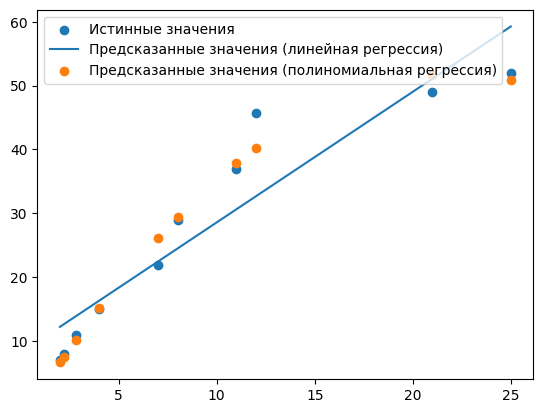

In [198]:
plt.scatter(X, y, label='Истинные значения');
plt.plot(X, lr.predict(X), label='Предсказанные значения (линейная регрессия)');
plt.scatter(X, lr2.predict(X_p), label='Предсказанные значения (полиномиальная регрессия)');
plt.legend();

Если у нас было бы несколько предикторов, то преобразование PolynomialFeatures позволило бы получить все возможные комбинации степеней. Кстати, никто не запрещает нам использовать полиномы более высоких степеней чем 2.

Теперь мы с вами знаем, как работает линейная и полиномиальная регрессия, умеем использовать регуляризации. <b>Поздравляю вас с началом вашего пути в ML!</b>